
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bank = pd.read_csv('./data/bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [15]:
# Perform what ever steps you need to familiarize yourself with the data:


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [5]:
# A:
X = bank[['duration', 'pdays','nr.employed']]
y = bank['y']


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [7]:
# convert selected features do dummies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# instant
log_mod = LogisticRegression()
knn_mod = KNeighborsClassifier()

#fit
knn_mod.fit(X_train, y_train)
log_mod.fit(X_train,y_train)

#preds logistic
y_preds = log_mod.predict(X_test)
y_probs = log_mod.predict_proba(X_test)

#preds knn
y_preds_knn = knn_mod.predict(X_test)
y_probs_knn = knn_mod.predict_proba(X_test)

#

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [8]:
# A:
np.exp(log_mod.coef_)

array([[1.00452971, 0.99705571, 0.99981755]])

### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [9]:
# A;
print(y_test.mean())
print(log_mod.score(X_test, y_test))
y_preds.mean()

0.10598705501618123
0.906957928802589


0.05663430420711974

In [10]:
# guess there are 1078 0's that I guess correctly.  There are 88 0's that I predict to be 1's.  
print(metrics.confusion_matrix(y_test, y_preds), sum(y_test))
np.round(metrics.precision_score(y_test, y_preds), 3) , metrics.recall_score(y_test, y_preds)

[[1078   27]
 [  88   43]] 131


(0.614, 0.3282442748091603)

In [11]:
y_probs

array([[0.80185057, 0.19814943],
       [0.9694316 , 0.0305684 ],
       [0.94957984, 0.05042016],
       ...,
       [0.93297148, 0.06702852],
       [0.96649022, 0.03350978],
       [0.97199949, 0.02800051]])

In [12]:
def pred_y(prob_row, threshold):
    if prob_row[1] > threshold:
        return 1
    return 0

y_preds2 = [pred_y(prob, 0.15) for prob in y_probs ]
metrics.confusion_matrix(y_test, y_preds2)

array([[984, 121],
       [ 47,  84]])

### Decision Tree Classifier and Gradient Boost

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=1000)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

preds_dt = dt.predict(X_test)
preds_rf = rf.predict(X_test)

print("Logistic Regression Results")
print(metrics.confusion_matrix(y_test, y_preds))
print(metrics.precision_score(y_test, y_preds) , metrics.recall_score(y_test, y_preds))

print("Decision Tree Results")
print(metrics.confusion_matrix(y_test, preds_dt))
print(metrics.precision_score(y_test, preds_dt) , metrics.recall_score(y_test, y_preds))

print("Random Forest Results")
print(metrics.confusion_matrix(y_test, preds_rf))
print(metrics.precision_score(y_test, preds_rf) , metrics.recall_score(y_test, y_preds))

Logistic Regression Results
[[1078   27]
 [  88   43]]
0.6142857142857143 0.3282442748091603
Decision Tree Results
[[1016   89]
 [  73   58]]
0.3945578231292517 0.3282442748091603
Random Forest Results
[[1028   77]
 [  68   63]]
0.45 0.3282442748091603


In [24]:
gb = GradientBoostingClassifier()

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.1, 1],
    "max_depth":[3, 8 ,10],
    "max_features":["sqrt"],
    "n_estimators":[10]
    }

clf = GridSearchCV(gb, parameters, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...ne,
                                                  presort='auto',

In [25]:

print(clf.best_params_)


{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}


In [26]:
gb_preds = clf.best_estimator_.predict(X_test)

In [27]:
print("Gradient Boosting Results")
print(metrics.confusion_matrix(y_test, gb_preds))
print(metrics.precision_score(y_test, gb_preds) , metrics.recall_score(y_test, gb_preds))

Gradient Boosting Results
[[1068   37]
 [  97   34]]
0.4788732394366197 0.2595419847328244


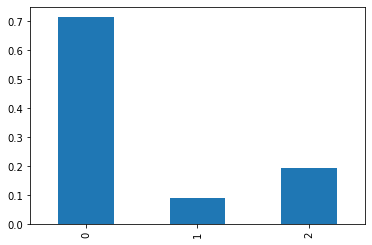

In [29]:
pd.Series(rf.feature_importances_).plot(kind='bar')



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [ ]:
# A:

**Visualize the distribution**

In [ ]:
# A:

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [ ]:
# A:

**Evaluate the model metrics now**

In [ ]:
# A:

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [ ]:
# A:

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'